In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

[{'box': [579, 173, 125, 175], 'confidence': 0.9998914003372192, 'keypoints': {'left_eye': (640, 229), 'right_eye': (694, 245), 'nose': (681, 264), 'mouth_left': (639, 299), 'mouth_right': (680, 311)}}]
[{'box': [599, 162, 115, 150], 'confidence': 0.9962617754936218, 'keypoints': {'left_eye': (622, 218), 'right_eye': (675, 218), 'nose': (639, 244), 'mouth_left': (624, 278), 'mouth_right': (667, 277)}}]


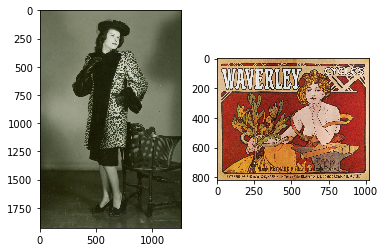

In [77]:
num_c = 10
num_s = 110

file_c = '.\\Data\\Content\\'+str(num_c)+'.jpg'
picture_c = Image.open(file_c)
file_s = '.\\Data\\Style\\'+str(num_s)+'.jpg'
picture_s = Image.open(file_s)

face_c = open('.\\Data\\Content\\'+str(num_c)+'.txt', "r")
face_string_c = face_c.read()
face_string_c = 'face_string_c = ' + face_string_c
if face_string_c != 'face_string_c = ': 
    exec(face_string_c)
    print(face_string_c)
else:
    print('No face here! Try different content image')
    
face_s = open('.\\Data\\Style\\'+str(num_s)+'.txt', "r")
face_string_s = face_s.read()
face_string_s = 'face_string_s = ' + face_string_s
if face_string_s != 'face_string_s = ': 
    exec(face_string_s)
    print(face_string_s)
else:
    print('No faces here! Try different style image')

plt.subplot(1, 2, 1)
plt.imshow(picture_c)
plt.subplot(1, 2, 2)
plt.imshow(picture_s)    

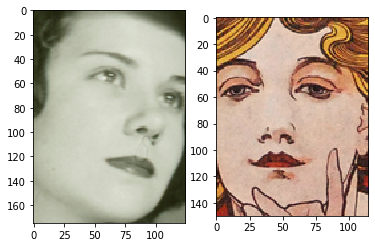

In [78]:
width_c, height_c = picture_c.size
width_s, height_s = picture_s.size

box_c = face_string_c[0]['box']
box_s = face_string_s[0]['box']

center_c = [box_c[0] + int(box_c[2]/2.), box_c[1] + int(box_c[3]/2.)]
center_s = [box_s[0] + int(box_s[2]/2.), box_s[1] + int(box_s[3]/2.)]

arr_c = np.array(picture_c)
arr_s = np.array(picture_s)

plt.subplot(1, 2, 1)
plt.imshow(arr_c[box_c[1]:(box_c[1]+box_c[3]), box_c[0]:(box_c[0] + box_c[2]),:])
plt.subplot(1, 2, 2)
plt.imshow(arr_s[box_s[1]:(box_s[1]+box_s[3]),(box_s[0]):(box_s[0] + box_s[2]),:])

In [79]:
if box_c[2]*box_c[3] >= box_s[2]*box_s[3]: scale  = 'content'
else: scale = 'style'
scale

'content'

0.888015443881146


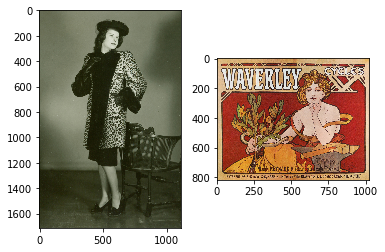

In [80]:
if scale == 'content':
    lambd = np.sqrt(box_s[2] * box_s[3]/(box_c[2] * box_c[3]))
    picture_c_new = picture_c.resize(size = [int(width_c * lambd), int(height_c * lambd)])
    box_c_new = (np.array(box_c)*lambd).astype('int')
    center_c_new = (np.array(center_c)*lambd).astype('int')
    width_c_new, height_c_new = picture_c_new.size
    plt.subplot(1, 2, 1)
    plt.imshow(picture_c_new)
    plt.subplot(1, 2, 2)
    plt.imshow(picture_s)
    
else:
    lambd = np.sqrt(box_c[2] * box_c[3]/(box_s[2] * box_s[3]))
    picture_s_new = picture_s.resize(size = [int(width_s * lambd), int(height_s * lambd)])
    box_s_new = (np.array(box_s)*lambd).astype('int')
    center_s_new = (np.array(center_s)*lambd).astype('int')
    width_s_new, height_s_new = picture_s_new.size
    plt.subplot(1, 2, 1)
    plt.imshow(picture_c)
    plt.subplot(1, 2, 2)
    plt.imshow(picture_s_new)

print(lambd)


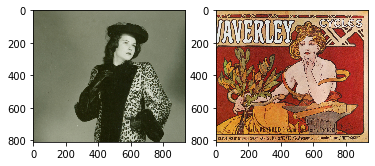

In [81]:
if scale == 'content':
    left = min(center_c_new[0], center_s[0])
    top = min(center_c_new[1], center_s[1])
    right = min(width_c_new - center_c_new[0], width_s - center_s[0])
    bottom = min(height_c_new - center_c_new[1], height_s - center_s[1])

    plt.subplot(1, 2, 1)
    plt.imshow(picture_c_new.crop((center_c_new[0] - left, center_c_new[1] - top, center_c_new[0] + right, center_c_new[1] + bottom)))
    plt.subplot(1, 2, 2)
    plt.imshow(picture_s.crop((center_s[0] - left, center_s[1] - top, center_s[0] + right, center_s[1] + bottom)))
    
else:
    left = min(center_c[0], center_s_new[0])
    top = min(center_c[1], center_s_new[1])
    right = min(width_c - center_c[0], width_s_new - center_s_new[0])
    bottom = min(height_c - center_c[1], height_s_new - center_s_new[1])

    plt.subplot(1, 2, 1)
    plt.imshow(picture_c.crop((center_c[0] - left, center_c[1] - top, center_c[0] + right, center_c[1] + bottom)))
    plt.subplot(1, 2, 2)
    plt.imshow(picture_s_new.crop((center_s_new[0] - left, center_s_new[1] - top, center_s_new[0] + right, center_s_new[1] + bottom)))
